In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

import pandas as pd
import random
import math

# libreria locale
import my_lib_modificata as my

In [2]:
# FAR FUNZIONARE IL FIT
# variabili da associare alla funzione fit
# m, sigma_m, c, sigma_c, cov_mc, rho_mc = my.lin_fit...
# cose da inserire dentro la funzione fit
# array x, array y, sigma_y, xlabel, ylabel, title, xmin, xmax, ymin, ymax, plot=True

In [3]:
# PARAMETRI DELLA RETTA DI CALIBRAZIONE
m00 =  173.7133
sigma_m00 =  0.1915
c00 =  -0.0152
sigma_c00 = 0.0011
cov00 = -0.0002
rho00 = -0.9585

In [4]:
# ANGOLO 1

<AxesSubplot: xlabel='t'>

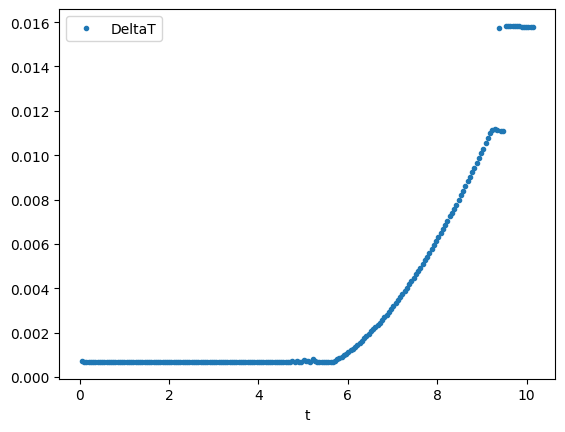

In [5]:
# IMPORTO I TEMPI E VEDO DOVE TAGLIARE
df = pd.read_csv('tang1_1.txt', header=1, sep='\t')
df = df.rename(columns={"Tempo ( s )":"t", "Tempo trascorso ( s )":"DeltaT"})
df.plot(x="t", y="DeltaT", linestyle="None", marker=".")

In [6]:
# TAGLIO I TEMPI INUTILI
df_new = df.drop(df[df.t <6 ].index | df[df.t > 9].index)

/var/folders/sh/g1b60r3n5jxcwjkdwqkp_3xw0000gn/T/ipykernel_9974/524429518.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df_new = df.drop(df[df.t <6 ].index | df[df.t > 9].index)


In [7]:
# USO DELLA RETTA DI CALIBRAZIONE
dTi = df_new.DeltaT.to_numpy()
sigma_dTi = np.repeat(0.0000003, len(dTi))

xi = m00*dTi + c00
sigma_xi = np.sqrt( (dTi**2)*(sigma_m00**2) + (m00**2)*(sigma_dTi**2) + sigma_c00**2 + 2*dTi*cov00 )

dTi, xi, sigma_xi

(array([0.001118, 0.001194, 0.001273, 0.001357, 0.001443, 0.001545,
        0.001637, 0.001733, 0.001833, 0.001945, 0.002048, 0.002153,
        0.002257, 0.002334, 0.002443, 0.002559, 0.002678, 0.002801,
        0.002925, 0.003052, 0.003194, 0.003326, 0.003461, 0.003599,
        0.003739, 0.00388 , 0.004027, 0.004175, 0.004325, 0.004479,
        0.004634, 0.004772, 0.004931, 0.005094, 0.005262, 0.005429,
        0.005607, 0.005778, 0.005952, 0.006129, 0.006307, 0.006488,
        0.006671, 0.006856, 0.007044, 0.007254, 0.007382, 0.007561,
        0.00777 , 0.007973, 0.008185, 0.008403, 0.008608, 0.008813,
        0.00902 , 0.00923 , 0.00944 , 0.009667, 0.009882, 0.010098]),
 array([0.17901147, 0.19221368, 0.20593703, 0.22052895, 0.23546829,
        0.25318705, 0.26916867, 0.28584515, 0.30321648, 0.32267237,
        0.34056484, 0.35880473, 0.37687092, 0.39024684, 0.40918159,
        0.42933233, 0.45000422, 0.47137095, 0.4929114 , 0.51497299,
        0.53964028, 0.56257044, 0.58602173, 0.

In [8]:
# X, SIGMA_X, Y, SIGMA_Y
t = df_new.t.to_numpy()

v = np.zeros(shape=len(xi)-1)
t_new = np.zeros(shape=len(v))
sigma_v = np.zeros(shape=len(v))

sigma_x = np.zeros(shape=len(xi)-1)
for i in range (0, len(xi)-2):
    sigma_x[i]=np.sqrt( ((sigma_xi[i])**2) + ((sigma_xi[i+1])**2) )

for i in range (0, len(xi)-1, 2):
    v[i]=(xi[i+1]-xi[i])/(t[i+1]-t[i])
    sigma_v[i]=np.sqrt(((1/(t[i+1]-t[i]))**2)*(sigma_dTi[i]**2)+(((xi[i+1]-xi[i])/((t[i+1]-t[i])**2))**2)*(sigma_x[i]**2)+(2*sigma_x[i]*sigma_dTi[i]))
    t_new[i] = t[i]
    
v = np.delete(v, np.argwhere(v == 0))
t_new = np.delete(t_new, np.argwhere(t_new == 0))
sigma_v = np.delete(sigma_v, np.argwhere(sigma_v == 0))
sigma_t_new = np.repeat(0.0000003, len(t_new))

In [9]:
# STIMA DI M COME DELTA_Y / DELTA_X
m0 = (v.max()-v.min())/(t_new.max()-t_new.min())
m0

# STIMA DI M CON FIT PER SIGMA_X = 0
# m0, sigma_m0, c0, sigma_c0, cov0, rho0 = my.lin_fit(t, v, sigma_v, "Tempo", "Velocità", t.min(), t.max(), v.min(), v.max(), plot=True)

0.178742334132847

m         =  0.1593
sigma(m)  =  0.0007
c         =  -0.6764
sigma(c)  =  0.0066
cov(m, c) =  -0.0
rho(m, c) =  -1.0


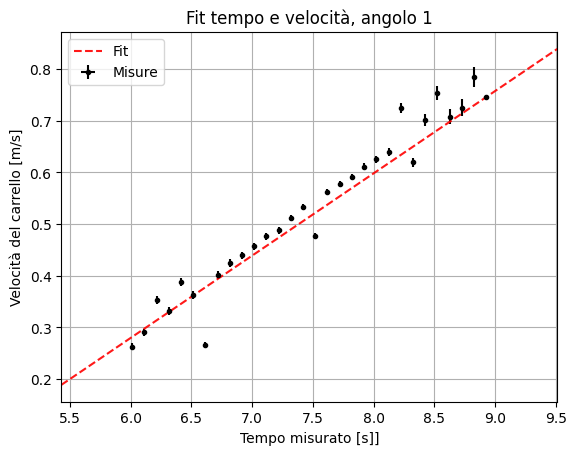

In [10]:
# NUOVE INCERTEZZE E FIT FINALE
sigma_v_new = np.sqrt(sigma_v**2+(m0*sigma_t_new)**2)
# sigma_v_new = sigma_v # tocca vedere se le incertezze sono comparabili o no e scegliere la riga di codice da usare
m, sigma_m, c, sigma_c, cov, rho = my.lin_fit(t_new, v, sigma_v_new, "Tempo misurato [s]]", "Velocità del carrello [m/s]", "Fit tempo e velocità, angolo 1", t_new.min(), t_new.max(), v.min(), v.max(), plot=True)

In [11]:
# STUDIO DEI RESIDUI
v_atteso = m*t_new + c
d = v - v_atteso
d_norm = d / sigma_v_new

Text(0.5, 0, 'Tempo misurato [s]')

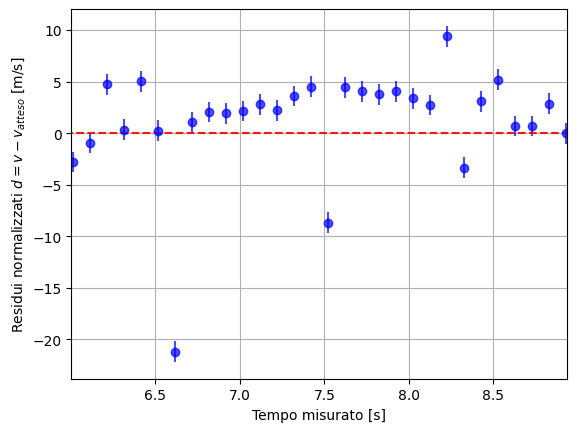

In [12]:
# RESIDUI NORMALIZZATI
plt.grid()
plt.errorbar(t_new, d_norm, sigma_v_new/sigma_v_new, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([t_new.min()-0.5, t_new.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(t_new.min()-0.01, t_new.max()+0.01)
plt.ylabel("Residui normalizzati $d=v-v_{atteso}$ [m/s]")
plt.xlabel("Tempo misurato [s]")

In [13]:
# ANGOLO 2

<AxesSubplot: xlabel='t'>

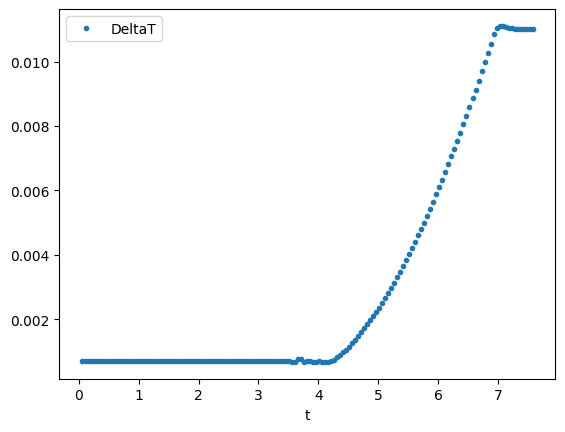

In [14]:
# IMPORTO I TEMPI E VEDO DOVE TAGLIARE
df = pd.read_csv('tang2_1.txt', header=1, sep='\t')
df = df.rename(columns={"Tempo ( s )":"t", "Tempo trascorso ( s )":"DeltaT"})
df.plot(x="t", y="DeltaT", linestyle="None", marker=".")

In [15]:
# TAGLIO I TEMPI INUTILI
df_new = df.drop(df[df.t <4.4 ].index | df[df.t > 6.5].index)

/var/folders/sh/g1b60r3n5jxcwjkdwqkp_3xw0000gn/T/ipykernel_9974/118343375.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df_new = df.drop(df[df.t <4.4 ].index | df[df.t > 6.5].index)


In [16]:
# USO DELLA RETTA DI CALIBRAZIONE
dTi = df_new.DeltaT.to_numpy()
sigma_dTi = np.repeat(0.0000003, len(dTi))

xi = m00*dTi + c00
sigma_xi = np.sqrt( (dTi**2)*(sigma_m00**2) + (m00**2)*(sigma_dTi**2) + sigma_c00**2 + 2*dTi*cov00 )

dTi, xi, sigma_xi

(array([0.000968, 0.001055, 0.00115 , 0.001251, 0.001354, 0.001465,
        0.001593, 0.001714, 0.001839, 0.001981, 0.002113, 0.002235,
        0.002339, 0.002493, 0.002645, 0.002801, 0.002961, 0.003124,
        0.003306, 0.003478, 0.003656, 0.003838, 0.004022, 0.004213,
        0.004407, 0.004606, 0.004789, 0.004996, 0.005207, 0.005423,
        0.005643, 0.005876, 0.006105, 0.006335, 0.00657 , 0.006809,
        0.007053, 0.007299, 0.007533, 0.007788, 0.008058, 0.008321]),
 array([0.15295447, 0.16806753, 0.1845703 , 0.20211534, 0.22000781,
        0.23928998, 0.26152529, 0.2825446 , 0.30425876, 0.32892605,
        0.3518562 , 0.37304923, 0.39111541, 0.41786726, 0.44427168,
        0.47137095, 0.49916508, 0.52748035, 0.55909617, 0.58897486,
        0.61989582, 0.65151165, 0.68347489, 0.71665413, 0.75035451,
        0.78492346, 0.81671299, 0.85267165, 0.88932515, 0.92684723,
        0.96506415, 1.00553935, 1.0453197 , 1.08527376, 1.12609638,
        1.16761386, 1.2099999 , 1.25273338, 1.

In [17]:
# X, SIGMA_X, Y, SIGMA_Y
t = df_new.t.to_numpy()

v = np.zeros(shape=len(xi)-1)
t_new = np.zeros(shape=len(v))
sigma_v = np.zeros(shape=len(v))

sigma_x = np.zeros(shape=len(xi)-1)
for i in range (0, len(xi)-2):
    sigma_x[i]=np.sqrt( ((sigma_xi[i])**2) + ((sigma_xi[i+1])**2) )

for i in range (0, len(xi)-1, 2):
    v[i]=(xi[i+1]-xi[i])/(t[i+1]-t[i])
    sigma_v[i]=np.sqrt(((1/(t[i+1]-t[i]))**2)*(sigma_dTi[i]**2)+(((xi[i+1]-xi[i])/((t[i+1]-t[i])**2))**2)*(sigma_x[i]**2)+(2*sigma_x[i]*sigma_dTi[i]))
    t_new[i] = t[i]
    
v = np.delete(v, np.argwhere(v == 0))
t_new = np.delete(t_new, np.argwhere(t_new == 0))
sigma_v = np.delete(sigma_v, np.argwhere(sigma_v == 0))
sigma_t_new = np.repeat(0.0000003, len(t_new))

In [18]:
# STIMA DI M COME DELTA_Y / DELTA_X
m0 = (v.max()-v.min())/(t_new.max()-t_new.min())
m0

# STIMA DI M CON FIT PER SIGMA_X = 0
# m0, sigma_m0, c0, sigma_c0, cov0, rho0 = my.lin_fit(t, v, sigma_v, "Tempo", "Velocità", t.min(), t.max(), v.min(), v.max(), plot=True)

0.3010408247828919

m         =  0.2863
sigma(m)  =  0.0016
c         =  -0.9318
sigma(c)  =  0.0105
cov(m, c) =  -0.0
rho(m, c) =  -1.0


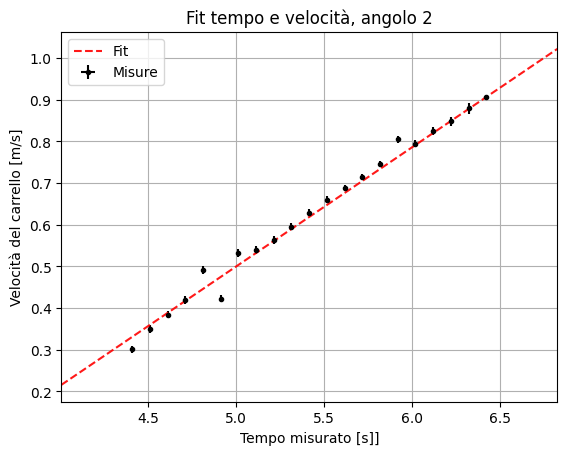

In [19]:
# NUOVE INCERTEZZE E FIT FINALE
sigma_v_new = np.sqrt(sigma_v**2+(m0*sigma_t_new)**2)
# sigma_v_new = sigma_v # tocca vedere se le incertezze sono comparabili o no e scegliere la riga di codice da usare
m, sigma_m, c, sigma_c, cov, rho = my.lin_fit(t_new, v, sigma_v_new, "Tempo misurato [s]]", "Velocità del carrello [m/s]", "Fit tempo e velocità, angolo 2", t_new.min(), t_new.max(), v.min(), v.max(), plot=True)

In [20]:
# STUDIO DEI RESIDUI
v_atteso = m*t_new + c
d = v - v_atteso
d_norm = d / sigma_v_new

Text(0.5, 0, 'Tempo misurato [s]')

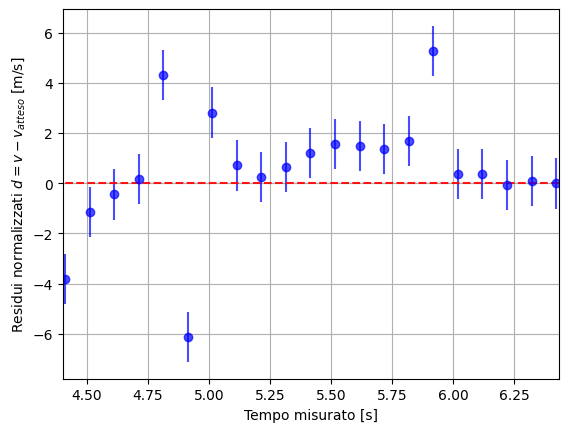

In [21]:
# RESIDUI NORMALIZZATI
plt.grid()
plt.errorbar(t_new, d_norm, sigma_v_new/sigma_v_new, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([t_new.min()-0.5, t_new.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(t_new.min()-0.01, t_new.max()+0.01)
plt.ylabel("Residui normalizzati $d=v-v_{atteso}$ [m/s]")
plt.xlabel("Tempo misurato [s]")

In [22]:
# ANGOLO 4

<AxesSubplot: xlabel='t'>

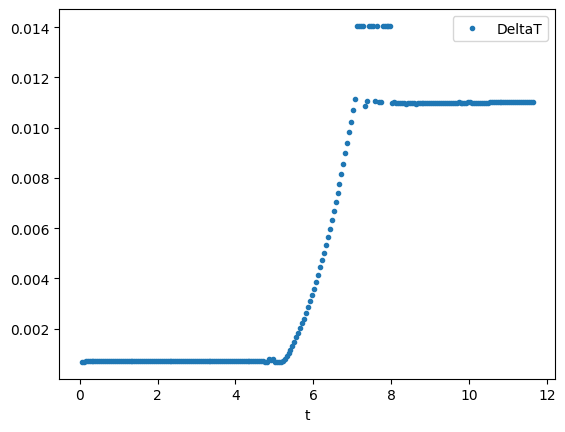

In [23]:
# IMPORTO I TEMPI E VEDO DOVE TAGLIARE
df = pd.read_csv('tang4_1.txt', header=1, sep='\t')
df = df.rename(columns={"Tempo ( s )":"t", "Tempo trascorso ( s )":"DeltaT"})
df.plot(x="t", y="DeltaT", linestyle="None", marker=".")

In [24]:
# TAGLIO I TEMPI INUTILI
df_new = df.drop(df[df.t <5.25 ].index | df[df.t > 7].index)

/var/folders/sh/g1b60r3n5jxcwjkdwqkp_3xw0000gn/T/ipykernel_9974/3547010584.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df_new = df.drop(df[df.t <5.25 ].index | df[df.t > 7].index)


In [25]:
# USO DELLA RETTA DI CALIBRAZIONE
dTi = df_new.DeltaT.to_numpy()
sigma_dTi = np.repeat(0.0000003, len(dTi))

xi = m00*dTi + c00
sigma_xi = np.sqrt( (dTi**2)*(sigma_m00**2) + (m00**2)*(sigma_dTi**2) + sigma_c00**2 + 2*dTi*cov00 )

dTi, xi, sigma_xi

(array([0.000782, 0.000903, 0.001024, 0.001162, 0.001311, 0.00147 ,
        0.001653, 0.001834, 0.002036, 0.00223 , 0.002399, 0.002616,
        0.002844, 0.003094, 0.003341, 0.003597, 0.003862, 0.004149,
        0.004437, 0.004713, 0.005015, 0.005328, 0.005652, 0.005984,
        0.006326, 0.006677, 0.007038, 0.007407, 0.007767, 0.008166,
        0.008564, 0.008971, 0.009387, 0.009813, 0.010244]),
 array([0.1206438 , 0.14166311, 0.16268242, 0.18665485, 0.21253814,
        0.24015855, 0.27194808, 0.30339019, 0.33848028, 0.37218066,
        0.40153821, 0.43923399, 0.47884063, 0.52226895, 0.56517614,
        0.60964674, 0.65568076, 0.70553648, 0.75556591, 0.80351078,
        0.8559722 , 0.91034446, 0.96662757, 1.02430039, 1.08371034,
        1.1446837 , 1.20739421, 1.27149441, 1.3340312 , 1.40334281,
        1.4724807 , 1.54318201, 1.61544675, 1.68944861, 1.76431905]),
 array([0.00096039, 0.00093884, 0.00091737, 0.00089299, 0.0008668 ,
        0.00083902, 0.00080729, 0.00077619, 0.00074184

In [26]:
# X, SIGMA_X, Y, SIGMA_Y
t = df_new.t.to_numpy()

v = np.zeros(shape=len(xi)-1)
t_new = np.zeros(shape=len(v))
sigma_v = np.zeros(shape=len(v))

sigma_x = np.zeros(shape=len(xi)-1)
for i in range (0, len(xi)-2):
    sigma_x[i]=np.sqrt( ((sigma_xi[i])**2) + ((sigma_xi[i+1])**2) )

for i in range (0, len(xi)-1, 2):
    v[i]=(xi[i+1]-xi[i])/(t[i+1]-t[i])
    sigma_v[i]=np.sqrt(((1/(t[i+1]-t[i]))**2)*(sigma_dTi[i]**2)+(((xi[i+1]-xi[i])/((t[i+1]-t[i])**2))**2)*(sigma_x[i]**2)+(2*sigma_x[i]*sigma_dTi[i]))
    t_new[i] = t[i]
    
v = np.delete(v, np.argwhere(v == 0))
t_new = np.delete(t_new, np.argwhere(t_new == 0))
sigma_v = np.delete(sigma_v, np.argwhere(sigma_v == 0))
sigma_t_new = np.repeat(0.0000003, len(t_new))

In [27]:
# STIMA DI M COME DELTA_Y / DELTA_X
m0 = (v.max()-v.min())/(t_new.max()-t_new.min())
m0

# STIMA DI M CON FIT PER SIGMA_X = 0
# m0, sigma_m0, c0, sigma_c0, cov0, rho0 = my.lin_fit(t, v, sigma_v, "Tempo", "Velocità", t.min(), t.max(), v.min(), v.max(), plot=True)

0.6493809036795215

m         =  0.6507
sigma(m)  =  0.0077
c         =  -3.0028
sigma(c)  =  0.0459
cov(m, c) =  -0.0004
rho(m, c) =  -0.9974


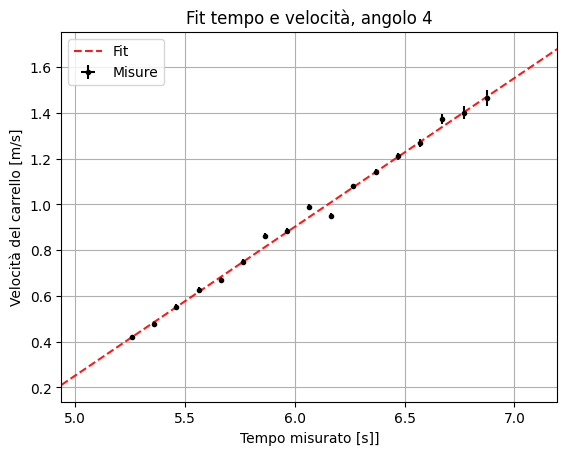

In [28]:
# NUOVE INCERTEZZE E FIT FINALE
sigma_v_new = np.sqrt(sigma_v**2+(m0*sigma_t_new)**2)
# sigma_v_new = sigma_v # tocca vedere se le incertezze sono comparabili o no e scegliere la riga di codice da usare
m, sigma_m, c, sigma_c, cov, rho = my.lin_fit(t_new, v, sigma_v_new, "Tempo misurato [s]]", "Velocità del carrello [m/s]", "Fit tempo e velocità, angolo 4", t_new.min(), t_new.max(), v.min(), v.max(), plot=True)

In [29]:
# STUDIO DEI RESIDUI
v_atteso = m*t_new + c
d = v - v_atteso
d_norm = d / sigma_v_new

Text(0.5, 0, 'Tempo misurato [s]')

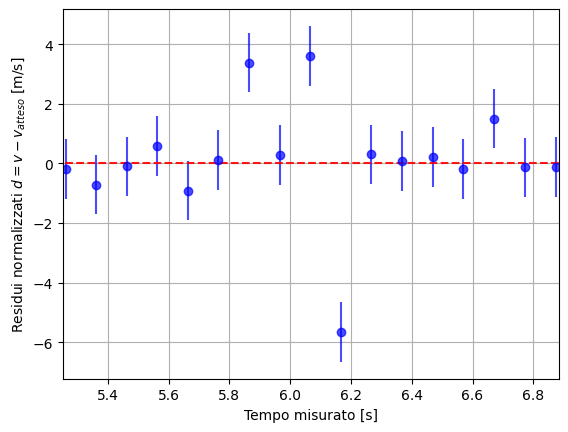

In [30]:
# RESIDUI NORMALIZZATI
plt.grid()
plt.errorbar(t_new, d_norm, sigma_v_new/sigma_v_new, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([t_new.min()-0.5, t_new.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(t_new.min()-0.01, t_new.max()+0.01)
plt.ylabel("Residui normalizzati $d=v-v_{atteso}$ [m/s]")
plt.xlabel("Tempo misurato [s]")

In [31]:
# ANGOLO 5

<AxesSubplot: xlabel='t'>

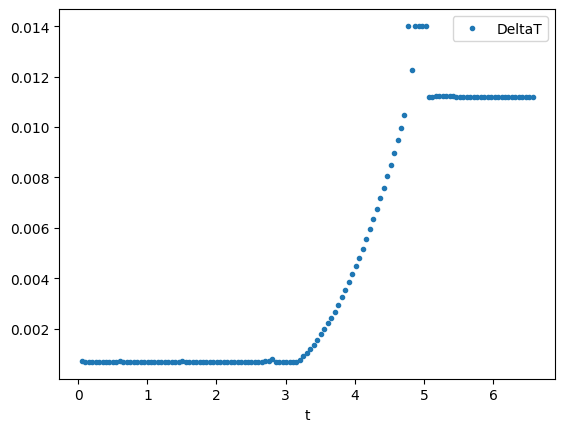

In [32]:
# IMPORTO I TEMPI E VEDO DOVE TAGLIARE
df = pd.read_csv('tang5_1.txt', header=1, sep='\t')
df = df.rename(columns={"Tempo ( s )":"t", "Tempo trascorso ( s )":"DeltaT"})
df.plot(x="t", y="DeltaT", linestyle="None", marker=".")

In [33]:
# TAGLIO I TEMPI INUTILI
df_new = df.drop(df[df.t <3.3 ].index | df[df.t > 4.7].index)

/var/folders/sh/g1b60r3n5jxcwjkdwqkp_3xw0000gn/T/ipykernel_9974/3980280729.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df_new = df.drop(df[df.t <3.3 ].index | df[df.t > 4.7].index)


In [34]:
# USO DELLA RETTA DI CALIBRAZIONE
dTi = df_new.DeltaT.to_numpy()
sigma_dTi = np.repeat(0.0000003, len(dTi))

xi = m00*dTi + c00
sigma_xi = np.sqrt( (dTi**2)*(sigma_m00**2) + (m00**2)*(sigma_dTi**2) + sigma_c00**2 + 2*dTi*cov00 )

dTi, xi, sigma_xi

(array([0.001025, 0.001186, 0.001361, 0.001552, 0.001767, 0.001996,
        0.002221, 0.002422, 0.002676, 0.002946, 0.003239, 0.003531,
        0.003839, 0.004158, 0.00449 , 0.004815, 0.005173, 0.005558,
        0.005941, 0.00634 , 0.006749, 0.007172, 0.00759 , 0.008048,
        0.008508, 0.008983, 0.009482, 0.009982]),
 array([0.16285613, 0.19082397, 0.2212238 , 0.25440304, 0.2917514 ,
        0.33153175, 0.37061724, 0.40553361, 0.44965679, 0.49655938,
        0.54745738, 0.59818166, 0.65168536, 0.7070999 , 0.76477272,
        0.82122954, 0.8834189 , 0.95029852, 1.01683072, 1.08614232,
        1.15719106, 1.23067179, 1.30328395, 1.38284464, 1.46275276,
        1.54526657, 1.63194951, 1.71880616]),
 array([0.00091719, 0.00088876, 0.00085805, 0.00082477, 0.00078767,
        0.00074861, 0.00071078, 0.00067752, 0.00063634, 0.00059379,
        0.00054941, 0.00050749, 0.00046646, 0.00042842, 0.00039501,
        0.00037005, 0.00035336, 0.00034982, 0.0003615 , 0.0003883 ,
        0.00042837, 

In [35]:
# X, SIGMA_X, Y, SIGMA_Y
t = df_new.t.to_numpy()

v = np.zeros(shape=len(xi)-1)
t_new = np.zeros(shape=len(v))
sigma_v = np.zeros(shape=len(v))

sigma_x = np.zeros(shape=len(xi)-1)
for i in range (0, len(xi)-2):
    sigma_x[i]=np.sqrt( ((sigma_xi[i])**2) + ((sigma_xi[i+1])**2) )

for i in range (0, len(xi)-1, 2):
    v[i]=(xi[i+1]-xi[i])/(t[i+1]-t[i])
    sigma_v[i]=np.sqrt(((1/(t[i+1]-t[i]))**2)*(sigma_dTi[i]**2)+(((xi[i+1]-xi[i])/((t[i+1]-t[i])**2))**2)*(sigma_x[i]**2)+(2*sigma_x[i]*sigma_dTi[i]))
    t_new[i] = t[i]
    
v = np.delete(v, np.argwhere(v == 0))
t_new = np.delete(t_new, np.argwhere(t_new == 0))
sigma_v = np.delete(sigma_v, np.argwhere(sigma_v == 0))
sigma_t_new = np.repeat(0.0000003, len(t_new))

In [36]:
# STIMA DI M COME DELTA_Y / DELTA_X
m0 = (v.max()-v.min())/(t_new.max()-t_new.min())
m0

# STIMA DI M CON FIT PER SIGMA_X = 0
# m0, sigma_m0, c0, sigma_c0, cov0, rho0 = my.lin_fit(t, v, sigma_v, "Tempo", "Velocità", t.min(), t.max(), v.min(), v.max(), plot=True)

0.8851452087491112

m         =  0.8943
sigma(m)  =  0.0051
c         =  -2.4138
sigma(c)  =  0.0236
cov(m, c) =  -0.0001
rho(m, c) =  -1.0


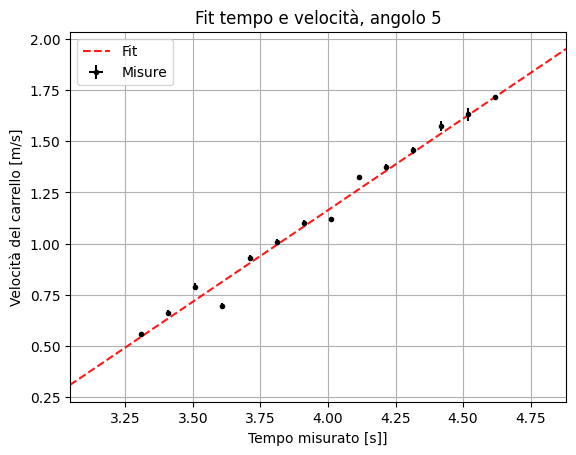

In [37]:
# NUOVE INCERTEZZE E FIT FINALE
sigma_v_new = np.sqrt(sigma_v**2+(m0*sigma_t_new)**2)
# sigma_v_new = sigma_v # tocca vedere se le incertezze sono comparabili o no e scegliere la riga di codice da usare
m, sigma_m, c, sigma_c, cov, rho = my.lin_fit(t_new, v, sigma_v_new, "Tempo misurato [s]]", "Velocità del carrello [m/s]", "Fit tempo e velocità, angolo 5", t_new.min(), t_new.max(), v.min(), v.max(), plot=True)

In [38]:
# STUDIO DEI RESIDUI
v_atteso = m*t_new + c
d = v - v_atteso
d_norm = d / sigma_v_new

Text(0.5, 0, 'Tempo misurato [s]')

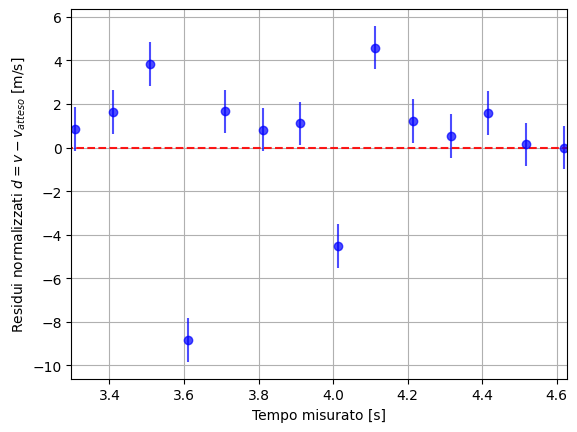

In [39]:
# RESIDUI NORMALIZZATI
plt.grid()
plt.errorbar(t_new, d_norm, sigma_v_new/sigma_v_new, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([t_new.min()-0.5, t_new.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(t_new.min()-0.01, t_new.max()+0.01)
plt.ylabel("Residui normalizzati $d=v-v_{atteso}$ [m/s]")
plt.xlabel("Tempo misurato [s]")